In [10]:
# Notebook Based on Skills Network labs

import pandas as pd
import numpy as np 
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)

# To see what the data set looks like, 10we'll use the head() method.
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
# Identify some missing values. It's possible to see them in the normalized-losses. In this
#dataset, missing values comes as a "?" symbol. In python, it's reliable use NaN to represent
#this values.

df.replace("?", np.nan, inplace = True) #to: replace a by b .replace(a, b)

df.head(5)



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
#Now that we can read the missing values, we can identify them:

missing_data = df.isnull()
missing_data.head(5)
#The true stands for missing value and false stands for present values. 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Let's map the missing data on the dataset
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

#### Dealing with the missing data
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [14]:
#To the normalized-losses, stroke, bore, horsepower and peak-rpm:

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#replace NaN values by mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)


In [15]:
avg_bore= df["bore"].astype("float").mean(axis = 0)
df["bore"].replace(np.nan, avg_bore, inplace = True)

avg_horsepower = df["horsepower"].astype("float").mean(axis = 0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)

avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis = 0)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace = True)

In [16]:
# The number-of-doors columns, we see how the values are distributed with value_couts() method:

df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [17]:
#Since the four doors type are the most commom, we do:

df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [18]:
#To the column price, we drop the rolls that has missing values in the price column:

df.dropna(subset = ["price"], axis = 0, inplace = True)

#We droped the rows, so we must reset the index:

df.reset_index(drop = True, inplace = True)

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Formating

As we can see below, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.



In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [23]:
#Conversion between metrics
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df["L/100km"] = 235/df["city-mpg"]

In [24]:

df["highway-L/100km"] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


### Data Normalization


Target:would like to Normalize those variables so their value ranges from 0 to 1.

Approach: replace original value by (original value)/(maximum value)

In [25]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df["height"]

0      0.816054
1      0.816054
2      0.876254
3      0.908027
4      0.908027
         ...   
196    0.928094
197    0.928094
198    0.928094
199    0.928094
200    0.928094
Name: height, Length: 201, dtype: float64

### Binning

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

In [26]:
# Convert data to correct format 
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

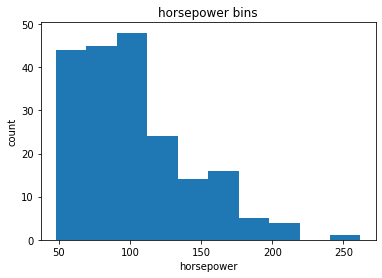

In [27]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [28]:
# The plot above shows us 11 different bins. But lets separate the horsepower data into three bins:

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) #divide the horsepower range into 4 bins
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [29]:
group_names = ['Low', 'Medium', 'High']

In [30]:
# We apply the function "cut" the determine what each value of "df['horsepower']" belongs to.  

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(8)


,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low


In [31]:
#Let's the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

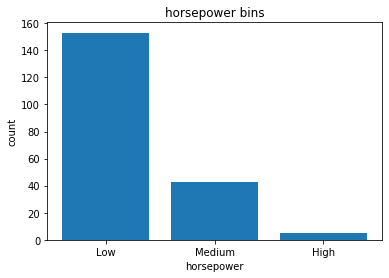

In [32]:
#PLot the data distibuition
%matplotlib inline

pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

In [33]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
#Change the names of the columns to clarity
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [35]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [36]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'L/100km',
       'highway-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [37]:
#create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1:

dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head(3)

,std,turbo
0,1,0
1,1,0
2,1,0


In [38]:
#Merge the new dataframe to the original dataframe then drop the column 'aspiration':
df = pd.concat([df, dummy_variable_2], axis = 1)
df.drop('aspiration', axis = 1, inplace = True)



In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'L/100km',
       'highway-L/100km', 'horsepower-binned', 'diesel', 'gas', 'std',
       'turbo'],
      dtype='object')

In [40]:
#save the new csv 

df.to_csv('clean_df.csv')

### Analyzing Individual Feature Patterns using Visualization: continuous data

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [42]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [43]:
#Correlation between some features
#As we can see, the diagonal values are 1.  
 df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0, 53407.428012488504)

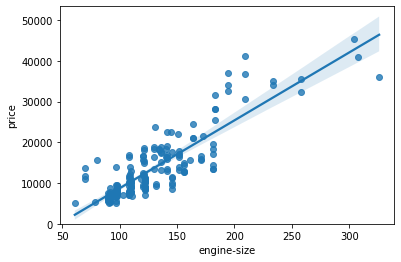

In [44]:
# regplot: to see the how a variable predicts other. On the plot below, we predict the variable price using
# the engine-size as predict variable. As the engine-size goes up, the price goes up too.  

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [45]:
df[["engine-size", "price"]].corr() #We can see that the correlation between engine-size and price are high.

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


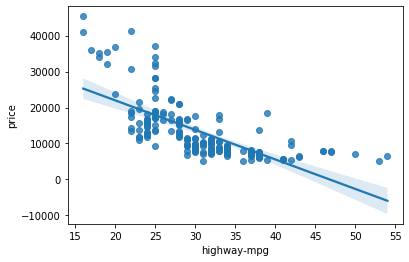

In [46]:
sns.regplot(x="highway-mpg", y="price", data=df)
# As the highway-mpg variable goes down, the price variables goes down to. So the two variables has a negative
#proportion. 

In [47]:
df[["highway-mpg", "price"]].corr()  # It agrees with the plot above. 

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


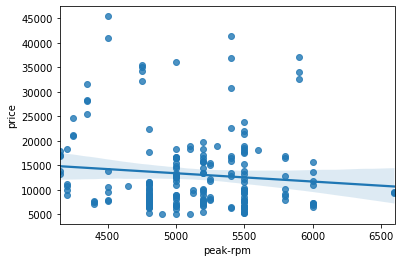

In [48]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [49]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Above, we have a example of variable that will not be useful as predict variable. There are too outliers and the 
regression curve doesn't fit them. The same happens with the stroke variable:


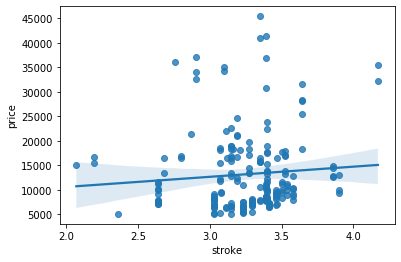

In [50]:
sns.regplot(x="stroke", y="price", data=df)

### Analyzing Individual Feature Patterns using Visualization: boxplot to deal with categorical data


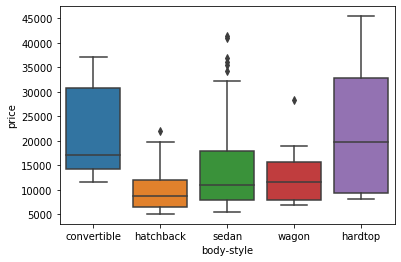

In [51]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

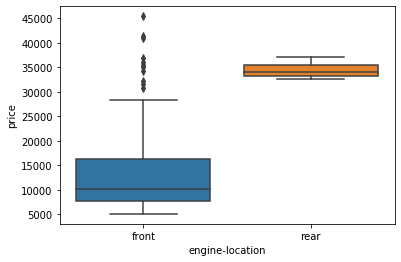

In [52]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

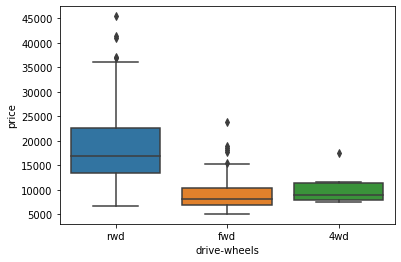

In [53]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis

In [54]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [55]:
#To see the statics values of objct-type variables:

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [56]:
#Value counts:

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [57]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [58]:
# Doing the same to engine-location variable 
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


"Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location."

### Grouping

In [59]:
df['drive-wheels'].unique() #Let's see the different categories of drive wheels

array(['rwd', 'fwd', '4wd'], dtype=object)

In [60]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [61]:
#Then let's calculate the mean of each group of the variable drive-wheels:

df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [62]:
#Converting the dataframe to a pivot:

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [63]:
# Filling the missing values with 0:

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [64]:
#Price's mean of each category of the variable body-style
df_group_two = df_gptest.groupby(['body-style'],as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


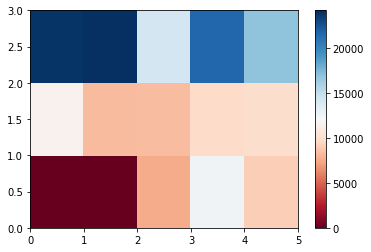

In [65]:
#Let's use heatmap to visualize the relationship between the body style and price:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

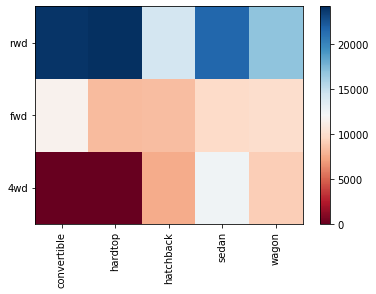

In [66]:
# We can see that the labels don't give us useful information, so let's change that:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation and Causation

In [67]:
df.corr() #Applies the pearson method (1,0,-1)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [68]:
from scipy import stats



Conclusion:
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [69]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


In [70]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


In [71]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


In [72]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [73]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


In [74]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


In [75]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


### ANOVA 

In [76]:
#First we 
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [77]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [78]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [79]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [80]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [81]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


#### Some tests and anotations 

Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore


Categorical variables:
* Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

### Module 4 - Model Development 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression And Multiple Linear Regression 

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# Let's see how highway-mpg helps us to predict the price of the value:

X = df[['highway-mpg']]
Y = df['price']

In [86]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Predicting the values
Yhat=lm.predict(X)

In [88]:
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [89]:
# The coefficients values (intercept and slope):

lm.intercept_

38423.3058581574

In [90]:
#The slope coeficient is negative due to the inversely proportional relationship between price and highway-mpg.(it's logic) 
lm.coef_ 

array([-821.73337832])

##### Multiple Linear Regression

Considering the following variables:


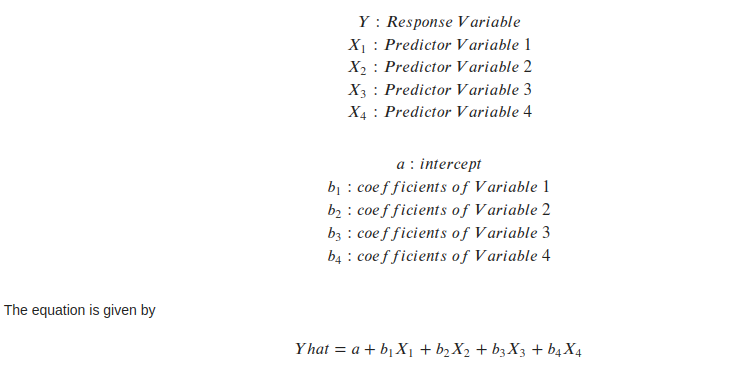

In [91]:
#As done in the previous section, we have to pass a predictor variable as a vector to fit the model. The difference
#here is that our predictor vector is multi dimensional:

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z,df['price'])

lm.intercept_

-15806.62462632922

In [92]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

So the model that estimates the car prices is:

Price = -15678.742628061467 + 53.49851272 x horsepower + 4.70778948 x curb-weight + 81.53026216 x engine-size + 36.05748185 x highway-mpg

### Model Evaluating using Visualization

Now that we developed our models, we might wonder which of them choose. To do that, we can see visualization to
pick a good one.

In [93]:
import seaborn as sns
%matplotlib inline 

#### Regression Plot

In this type of plot, the data are displayed as a scatter plot with a Linear Regression line on it. 

(0, 48178.29564252573)

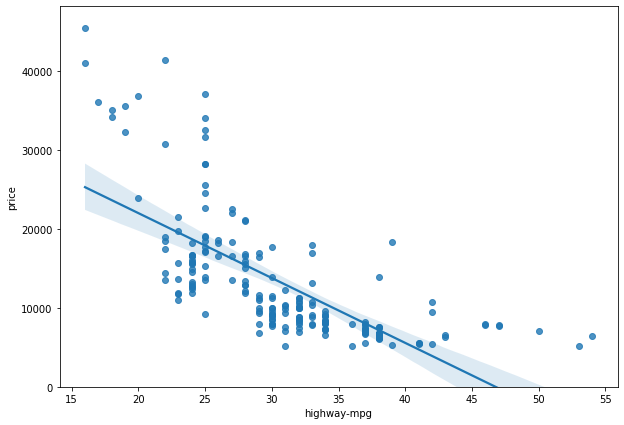

In [94]:
plt.figure(figsize=(10, 7))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47414.10953957742)

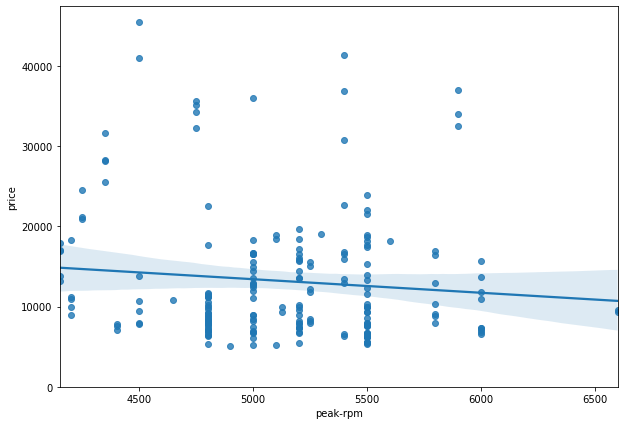

In [95]:
plt.figure(figsize=(10, 7))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

 In the first plot, it's easy to note that the highway-mpg variable is better than peak-rmp to predict the price
 of the vehicles, since the peak-rpm gives us random samples (we can see that the regression line doesn't fit well in the data).  

#### Residual Plot

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis. A 'residual' can be defined as the difference between the observed value y and the predicted value yHat. When the points of the residual plot are randomly spread, the variance of the samples is constant and
the linear regression is appropriate to fit the data. 

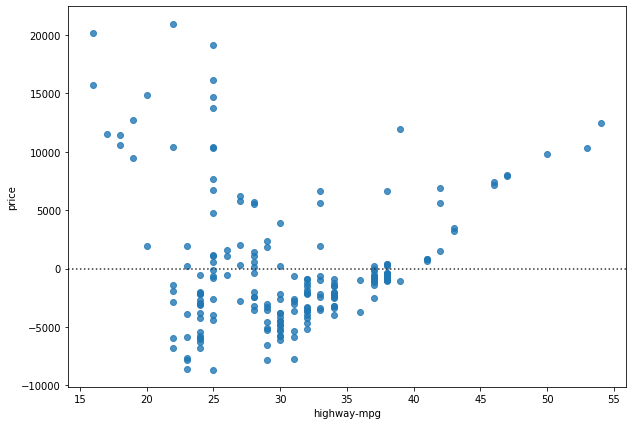

In [96]:
plt.figure(figsize=(10, 7))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In this case, the points are not randomly distributed, what may indicate that a non linear model are more interesting. 

#### Visualing Multiple Regression

We can't visualize multiple regression with residual plot or regression plot. To overcome that, a reasonable choice is plot the fitted values and the real values, to compare between them. 

In [97]:
#First we predict the data:

Y_hat = lm.predict(Z)

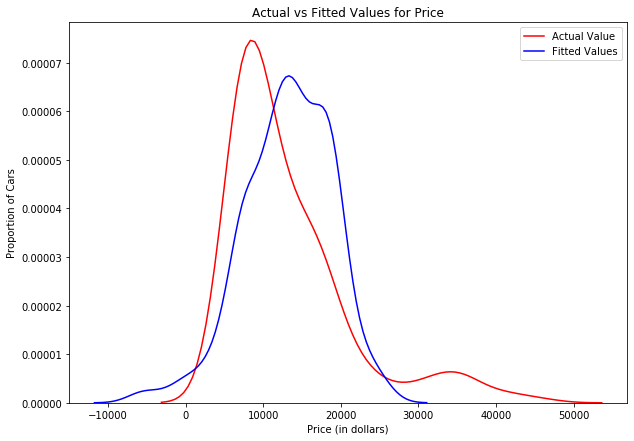

In [98]:
plt.figure(figsize=(10, 7))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### Polynomial regression

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [99]:
# auxiliar function to plot de polinomy
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [100]:
x = df['highway-mpg']
y = df['price']

#fitting the data and display the resutling polymial (cubic):

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


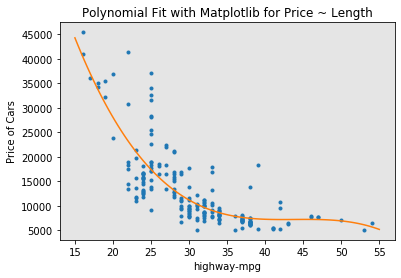

In [101]:
PlotPolly(p,x,y,'highway-mpg')

We can clearly see that our polynomial regression fits better the data than linear regression. It's because the polinomyal regression "hits" more points of the data than the linear model. Let's plot an order 11 polinomy to see how it fits to the data. 

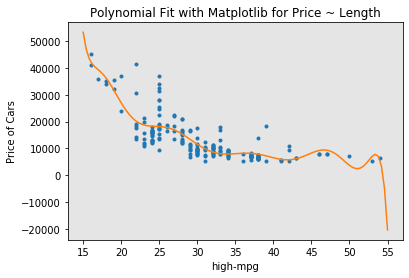

In [102]:
f = np.polyfit(x,y,11)
p = np.poly1d(f)
PlotPolly(p,x,y,'high-mpg')

Here, we just perform the fitting using one variable. To use multiple variables to perform polinomyal regression, we use the module from scikit-learn:

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [105]:
Z_pr=pr.fit_transform(Z)
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


The original data is of 201 samples and 4 features. The shape of the transformed data is:

In [106]:
Z_pr.shape # 201 samples and 15 features

(201, 15)

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [108]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [109]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Now, it's possible to normalize the data,  perform a transform and fit the model simultaneously:

In [110]:
pipe.fit(Z,y);

In [111]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Creating a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y: 

In [112]:
Input=[('scale',StandardScaler()), ('model',LinearRegression())]

pipe2 = Pipeline(Input)

pipe2.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [113]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Measures for In-Sample Evaluation

The two commom metrics to measure the accuracy of the model are R² and MSE. 

#### Measures for the Simple Linear Regression

In [114]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [115]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [116]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Measures for the Multiple Linear Regression

In [117]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [118]:
Y_predict_multifit = lm.predict(Z)

In [119]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Measures for the Multiple Polynomial Fit

In [120]:
from sklearn.metrics import r2_score

In [121]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769093756598


In [122]:
mean_squared_error(df['price'], p(x))

18703127.63085496

### Prediction and Decision Making

* To train our model, we use the fit method;
* To predict the data, we use the predict method.

In [123]:
new_input=np.arange(1, 100, 1).reshape(-1, 1) 

lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

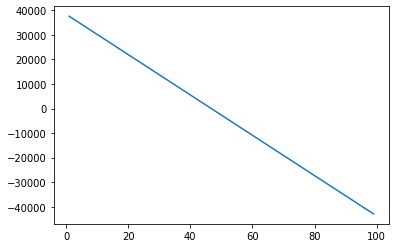

In [125]:
plt.plot(new_input, yhat)
plt.show()

To help with the decision of which model adopt:

* The R² value should be high;
* The MSE should be low.

Analyzing the results, for that data, we see that the **Multiple Linear Regression** is the greatest model to use among the others, as it has a higher value of R2 and a lower value of MSE.  


### Model Evaluation and Refinement

In [126]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [127]:
df.to_csv('module_5_auto.csv')
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [128]:
%%capture
! pip install ipywidgets

In [129]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Functions to plotting 

In [130]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [131]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Training and testing

In [132]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [133]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 31
number of training samples: 170


In [134]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [135]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

#### Cross-validation score

In [136]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) #cv = number of folds
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [137]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [138]:
#using the MSE:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [139]:
from sklearn.model_selection import cross_val_predict #used to predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

#### Analysis of overfitting, overfitting and Model Selection

In [140]:
#Let's create Multiple linear regression objects and train the model using 
#'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
# The analysis is easier in multiple linear regression

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
#prediction using the train data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [142]:
#prediction using the test data

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [143]:
#Lets perform some evaluation using the training and test data separately

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

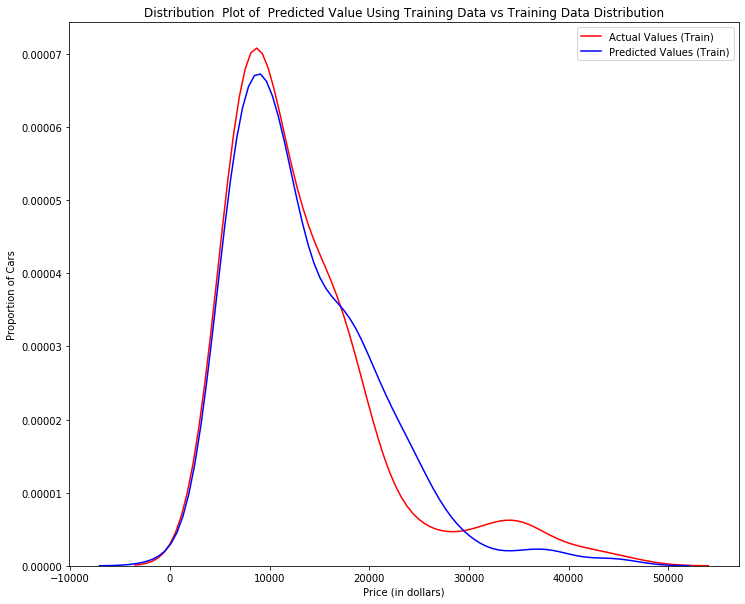

In [144]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

By analyzing the plot above, we see that the model performs well in learning from the training data. But if it encounters new data? What will be its behaviour?

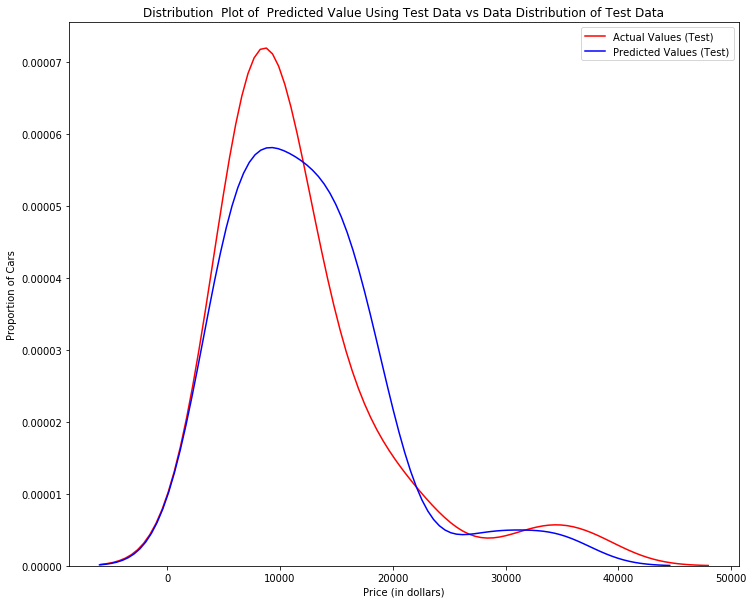

In [145]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Analysing the two figures, it is obvious that the curve that stands for the predicted values (blue) in the figure 1 is more accurate than the blue one of the test set. 

Let's see if the polynomial aproximation for fitting the data also behaviour like that:

In [154]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [147]:
#Now let's create a linear regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [156]:
#Comparing the predicted values to the reals
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

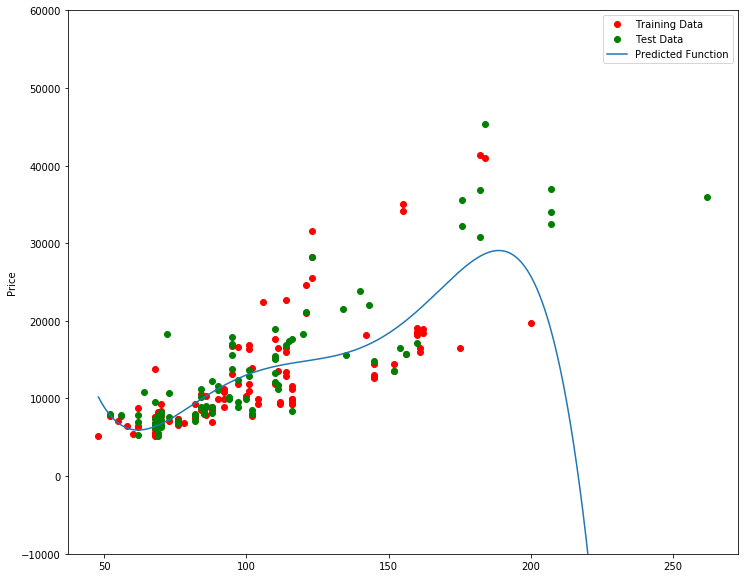

In [157]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

In [158]:
#R² for the training data
poly.score(x_train_pr, y_train)

0.556771690212023

In [159]:
#R² for the testing data
poly.score(x_test_pr, y_test)

-29.871340302044153

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

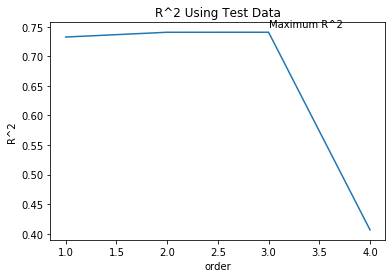

In [160]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


In [161]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [162]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

#Some Exercises 

*We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.*


In [171]:
pr1 = PolynomialFeatures(degree = 2)


*Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform"*

In [172]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight', 'engine-size','highway-mpg']])
pr1

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

How many dimensions does the new feature have? Hint: use the attribute "shape"

In [173]:
x_train_pr1.shape

(110, 15)

In [174]:
x_test_pr1.shape

(91, 15)

*Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial.*

In [175]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted output vs the test data*

In [176]:
yhat1 = poly1.predict(x_test_pr1)
yhat1[0:4]

array([ 6303.02917847, 10402.8714809 , 20516.37185566, 19273.87340837])

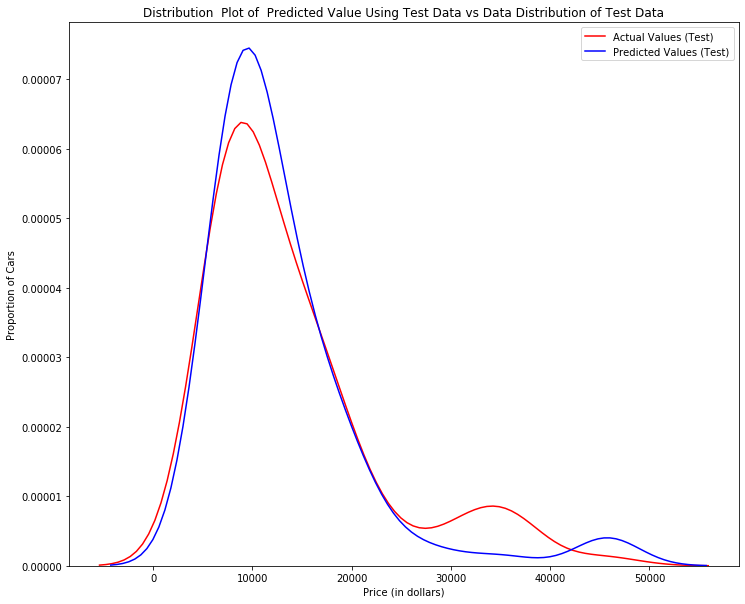

In [177]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat1, "Actual Values (Test)", "Predicted Values (Test)", Title)


### Ridge Regression 

Let's see how the alpha parameter of the ridge regression modify the learning. 

In [178]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [179]:
from sklearn.linear_model import Ridge

In [185]:
RidgeModel=Ridge(alpha=0.1)

In [186]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [187]:
yhat = RigeModel.predict(x_test_pr)

In [188]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [189]:
#Let's select the alpha value the maximize the R² value

Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

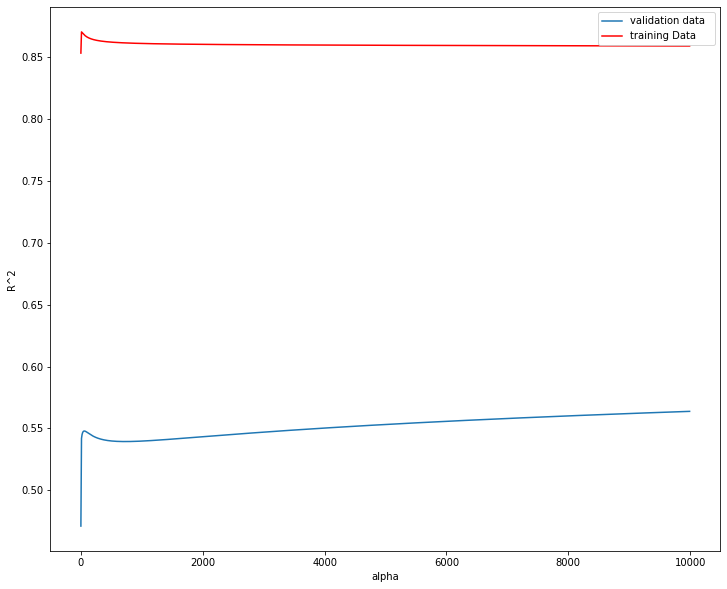

In [190]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Grid Search

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [193]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [194]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [196]:
# Fitting the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [197]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [198]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [199]:
# Using, now, the normalize parameter: 

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]},
                {'normalize': [True,False]}]

Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

BestRR=Grid1.best_estimator_
BestRR

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [200]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7688497506498385